<a href="https://colab.research.google.com/github/9-coding/PyTorch/blob/main/Practice/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [137]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from torch import optim
from torch.nn import Module, init, Linear, Parameter
from IPython.display import display, Math, Latex # for display

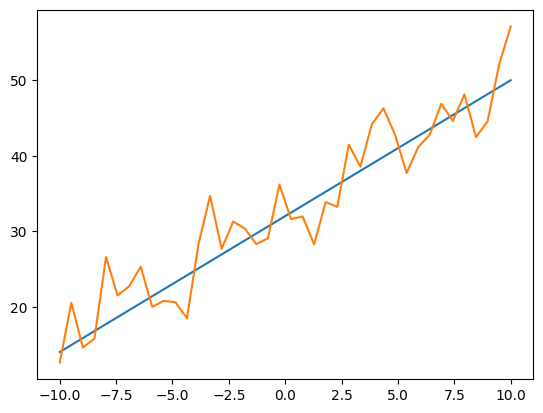

In [103]:
x = np.linspace(-10, 10, 40)
y_ideal = 1.8*x + 32.
y_noise = y_ideal + 4*np.random.randn((40)) # 노이즈 추가

plt.plot(x,y_ideal, x, y_noise)

In [104]:
y_noise = torch.tensor(y_noise).float()
x = torch.tensor(x).float()

In [105]:
def linear(x, w, b):
  y = w * x + b
  return y

def mse(pred, y):
  mse = ((pred - y)**2).mean()
  return mse

In [106]:
w = torch.ones(())
b = torch.zeros(())
w, b

(tensor(1.), tensor(0.))

L = mse(H(x) - y)^2

dL/dw = dL/dH * dH/dw

In [107]:
def dLdH_f(pred, y):
  return 2 * (pred - y)

def dHdw_f(x, w, b):
  return x

def dHdb_f(x, w, b):
  return 1

In [108]:
def get_grad(x, w, b, pred, y):
  dLdH = dLdH_f(pred, y)
  dLdw = dLdH * dHdw_f(x, w, b)
  dLdb = dLdH * dHdb_f(x, w, b)
  return torch.stack([dLdw.mean(), dLdb.mean()])

In [109]:
def training_loop(x, y, w, b, n_epoch, lr):
  for epoch in range(n_epoch):
    pred = linear(x, w, b)
    loss = mse(pred, y)

    grad = get_grad(x, w, b, pred, y)

    w = w - lr * grad[0]
    b = b - lr * grad[1]

    if epoch % 1000 == 0:
      print(f'epoch {epoch} Loss: {loss}')

  return w, b

In [110]:
w, b = training_loop(x, y_noise, w, b, 5000, 1e-3)

epoch 0 Loss: 1113.179443359375
epoch 1000 Loss: 33.615936279296875
epoch 2000 Loss: 14.267400741577148
epoch 3000 Loss: 13.91443920135498
epoch 4000 Loss: 13.907999038696289


tensor(1.7350) tensor(32.8670)


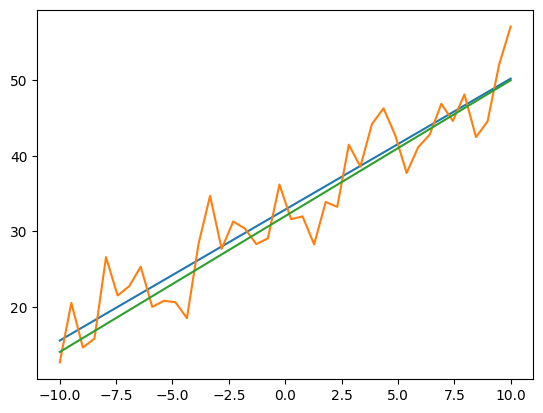

In [111]:
pred = linear(x, w, b)
print(w, b)
plt.plot(x, pred, x, y_noise, x, y_ideal)
plt.show()

<hr>

In [114]:
def ds_training(x, y, model, params, n_epoch, lr):
  print(params)
  for epoch in range(n_epoch):
    if params.grad is not None:
      params.grad.zero_()

    pred = model(x, *params)
    l = mse(pred, y)

    l.backward()

    with torch.no_grad():
      params -= lr * params.grad

    if epoch % 1000 == 0:
      print(f"epoch: {epoch} Loss: {l}")
  return params

In [115]:
params = torch.tensor(
    [1., 0.],
    requires_grad = True
)
params = ds_training(x, y_noise,
                     model=linear,
                     params=params,
                     n_epoch=5000,
                     lr=1e-3)

tensor([1., 0.], requires_grad=True)
epoch: 0 Loss: 1113.179443359375
epoch: 1000 Loss: 33.61593246459961
epoch: 2000 Loss: 14.267402648925781
epoch: 3000 Loss: 13.914438247680664
epoch: 4000 Loss: 13.907997131347656


tensor([ 1.7350, 32.8670], requires_grad=True)
tensor(1.7350, grad_fn=<UnbindBackward0>) tensor(32.8670, grad_fn=<UnbindBackward0>)


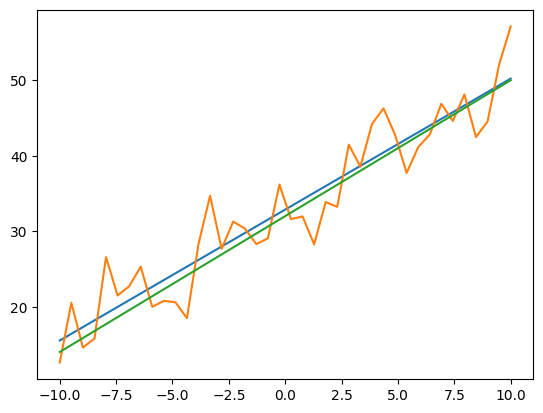

In [121]:
pred = linear(x, *params)
print(params)
print(*params)
plt.plot(x, pred.detach(), x, y_noise, x, y_ideal)
plt.show()

<hr>

In [156]:
def ds_training_optim(x, y, model, params, n_epoch, optimizer):
  for epoch in range(n_epoch):
    pred = model(x, *params)
    l = mse(pred, y)

    optimizer.zero_grad()
    l.backward()
    optimizer.step()

    if epoch % 1000 == 0:
      print(f'epoch {epoch} loss: {l}')
  return params

In [159]:
params = torch.tensor(
    [1., 0.],
    requires_grad = True
)

optimizer = optim.SGD(
    [params],
    lr = 1e-3
)

params = ds_training_optim(x, y_noise, linear, params, 5000, optimizer)

epoch 0 loss: 1113.179443359375
epoch 1000 loss: 33.61593246459961
epoch 2000 loss: 14.267402648925781
epoch 3000 loss: 13.914438247680664
epoch 4000 loss: 13.907997131347656


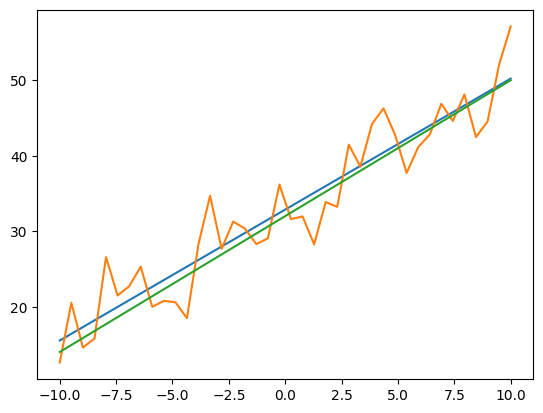

In [160]:
pred = linear(x, *params)
plt.plot(x, pred.detach(), x, y_noise, x, y_ideal)
plt.show()

<hr>

In [158]:
x = x.reshape(-1,1)
y_noise = y_noise.reshape(-1,1)

In [149]:
class DsLinearModel(Module):
  def __init__(self, n_in_f, n_out_f):
    super().__init__()
    init_w = torch.ones(1,1)
    init_b = torch.zeros(1)
    self.l0 = Linear(n_in_f, n_out_f)
    self.l0.weight = Parameter(init_w)
    self.l0.bias = Parameter(init_b)

  def forward(self, x):
    y = self.l0(x)
    return y

In [163]:
def training_ds_linear(x, y, model, n_epoch):
  model.train()

  optimizer = optim.SGD(model.parameters(), lr=1e-3)
  for epoch in range(n_epoch):
    pred = model(x)
    l = mse(pred, y)

    optimizer.zero_grad()
    l.backward()
    optimizer.step()

    if epoch % 1000 == 0:
      print(f'epoch {epoch} loss: {l}')
  return model

In [162]:
model = DsLinearModel(1, 1)

model = training_ds_linear(x, y_noise, model, 5000)

epoch 0 loss: 1113.179443359375
epoch 1000 loss: 33.61593246459961
epoch 2000 loss: 14.267400741577148
epoch 3000 loss: 13.914438247680664
epoch 4000 loss: 13.907999038696289


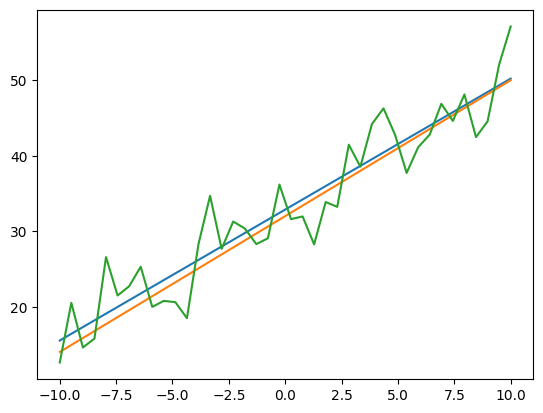

In [164]:
pred = model(x)
plt.plot(x.detach().numpy(), pred.detach().numpy(), x, y_ideal, x, y_noise)